In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
data_org = pd.read_csv('/content/drive/MyDrive/datasets/weatherHistory.csv')
data_org.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### preprocess

In [3]:
data = data_org.copy()
data['date'] = data['Formatted Date'].map(lambda date: date[:10])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01


In [4]:
temps = data.groupby('date')['Temperature (C)'].mean().reset_index()
temps.head()

,date,Temperature (C)
0,2006-01-01,3.873148
1,2006-01-02,5.418519
2,2006-01-03,2.319444
3,2006-01-04,2.274074
4,2006-01-05,2.698148


In [5]:
temps['date'] = pd.to_datetime(temps['date'])
temps['Day of year'] = temps['date'].map(lambda date: date.dayofyear)
temps

,date,Temperature (C),Day of year
0,2006-01-01,3.873148,1
1,2006-01-02,5.418519,2
2,2006-01-03,2.319444,3
3,2006-01-04,2.274074,4
4,2006-01-05,2.698148,5
...,...,...,...
4013,2016-12-27,0.280324,362
4014,2016-12-28,0.224306,363
4015,2016-12-29,0.169676,364
4016,2016-12-30,0.119444,365


In [6]:
temps.drop('date', axis=1, inplace=True)
temps.head()

,Temperature (C),Day of year
0,3.873148,1
1,5.418519,2
2,2.319444,3
3,2.274074,4
4,2.698148,5


In [149]:
x = temps['Day of year']
y = temps['Temperature (C)']
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Model

In [150]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, 'tanh', input_shape=(1,)),
    tf.keras.layers.Dense(32, 'relu'),
    tf.keras.layers.Dense(8, 'relu'),
    tf.keras.layers.Dense(1, 'linear')
])

model.compile(tf.keras.optimizers.Adamax(.00015) , tf.keras.losses.mse)
model.fit(x_train, y_train, epochs=700)

Epoch 1/700
95/95 [==============================] - 1s 2ms/step - loss: 180.5739
Epoch 2/700
95/95 [==============================] - 0s 2ms/step - loss: 138.2468
Epoch 3/700
95/95 [==============================] - 0s 2ms/step - loss: 109.1703
Epoch 4/700
95/95 [==============================] - 0s 2ms/step - loss: 89.4367
Epoch 5/700
95/95 [==============================] - 0s 2ms/step - loss: 77.1133
Epoch 6/700
95/95 [==============================] - 0s 2ms/step - loss: 70.7704
Epoch 7/700
95/95 [==============================] - 0s 2ms/step - loss: 67.4999
Epoch 8/700
95/95 [==============================] - 0s 2ms/step - loss: 65.8235
Epoch 9/700
95/95 [==============================] - 0s 2ms/step - loss: 64.8769
Epoch 10/700
95/95 [==============================] - 0s 2ms/step - loss: 64.1275
Epoch 11/700
95/95 [==============================] - 0s 2ms/step - loss: 63.3309
Epoch 12/700
95/95 [==============================] - 0s 2ms/step - loss: 62.3659
Epoch 13/700
95/95 [==

## pre-plot

In [153]:
x_test_sorted = x_test.sort_values() # cost me 2 days to notice this bullshit
y_pred = model.predict(x_test_sorted)

32/32 [==============================] - 0s 1ms/step


## Plot

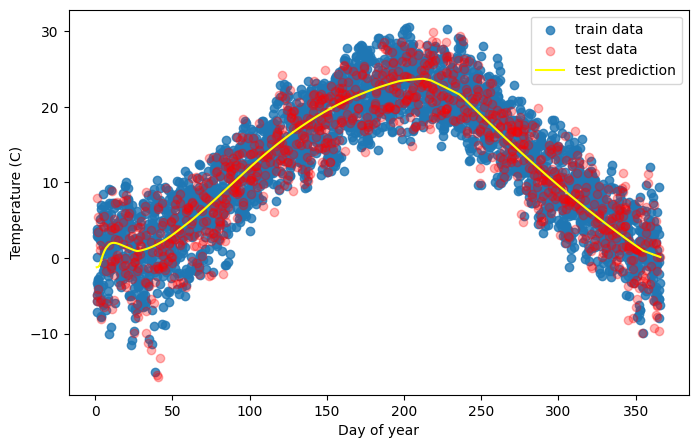

In [152]:
plt.figure(figsize=(8,5))

plt.scatter(x_train, y_train, alpha=.8, label='train data')
plt.scatter(x_test, y_test, color='red', alpha=.3, label='test data')
plt.plot(x_test_sorted, y_pred, color='yellow', label='test prediction')

plt.xlabel('Day of year')
plt.ylabel('Temperature (C)')
plt.legend()